In [1]:
import TensorFrost as tf
import numpy as np

tf.initialize(tf.opengl)

N = 141871

def shuffle_test():
    idx, = tf.indices([N])
    idx = tf.random.shuffle(idx, N, 0)
    return idx

shuffle_test_func = tf.compile(shuffle_test)

TensorFrost module loaded!
shuffle_test:
  Kernel count: 1
  Intermediate buffers: 0
  Host readbacks: 0
  Host writes: 0
  Lines of generated code: 502
  IR Compile time: 7.158600 ms
  Codegen time: 1.254400 ms
  Host Compile time: 1396.911133 ms
  Shader Compile time: 0.639700 ms



In [2]:
shuffled = shuffle_test_func()

shuffled = shuffled.numpy
print(shuffled)

#check if values are unique
print(np.unique(shuffled).size == shuffled.size)

[  3001  23086  29936 ... 110001 126169  46253]
True


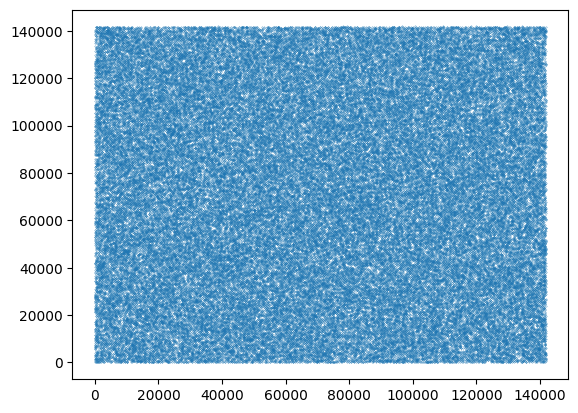

[ 15079  72733  39614 ...  50057   5192 128037]


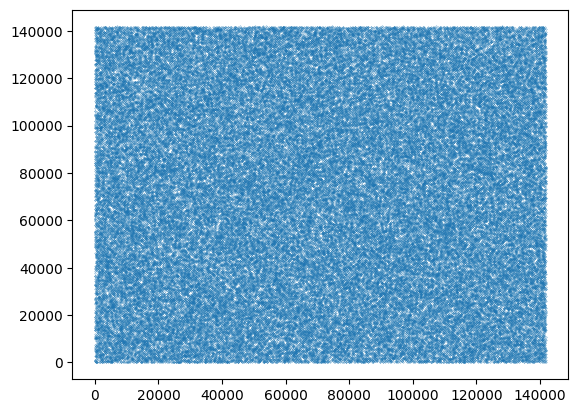

In [3]:
#plot the shuffled indices as scatter plot
import matplotlib.pyplot as plt
plt.scatter(np.arange(N), shuffled, s=0.05)
plt.show()

#compare with numpy shuffle
shuffled_np = np.arange(N)
np.random.seed(1)
np.random.shuffle(shuffled_np)
print(shuffled_np)
plt.scatter(np.arange(N), shuffled_np, s=0.05)
plt.show()